In [2]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data

In [6]:
pip install --upgrade yfinance
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
warnings.resetwarnings()  


In [7]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [13]:
import requests

# Providing the URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as html_data
html_data = response.text

In [14]:
# Create a BeautifulSoup object to parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')

In [18]:
# Finding the quarterly revenue table
tables = soup.find_all('table', class_='historical_data_table')

# Looking for the second table on display on the webpage (first is annual revenue, I need the second table)
quarterly_table = tables[1]

# Extract the table data
rows = quarterly_table.find_all('tr')
data = []

for row in rows:
    cols = row.find_all('td')
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Create the DataFrame
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Print last 5 rows
last_5_rows = tesla_revenue.tail(5)
print(last_5_rows)


          Date Revenue
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31        
52  2009-09-30     $46
53  2009-06-30     $27


## Question 3: Use yfinance to Extract Stock Data

In [19]:
gamestop = yf.Ticker("GME")

In [20]:
# Extracting stock information with period set to max
gme_data = gamestop.history(period="max")

In [21]:
# Reset the index inplace
gme_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data dataframe
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data

In [22]:
import requests

# Providing the URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as html_data
html_data = response.text

In [23]:
# Create a BeautifulSoup object to parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')

In [25]:
# Finding the quarterly revenue table
tables = soup.find_all('table', class_='historical_data_table')

# Looking for the second table on display on the webpage (first is annual revenue, I need the second table)
quarterly_table = tables[1]

# Extract the table data
rows = quarterly_table.find_all('tr')
data = []

for row in rows:
    cols = row.find_all('td')
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Create the DataFrame
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True)

# Printing last 5 rows
last_5_rows = gme_revenue.tail(5)
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True)
print(last_5_rows)

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


<>:20: DeprecationWarning: invalid escape sequence '\$'
<>:24: DeprecationWarning: invalid escape sequence '\$'
<>:20: DeprecationWarning: invalid escape sequence '\$'
<>:24: DeprecationWarning: invalid escape sequence '\$'
/tmp/ipykernel_919/711905688.py:20: DeprecationWarning: invalid escape sequence '\$'
  gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True)
/tmp/ipykernel_919/711905688.py:24: DeprecationWarning: invalid escape sequence '\$'
  gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True)


## Question 5: Plot Tesla Stock Graph

In [30]:
pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 111.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 118.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 106.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 13.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
import matplotlib.pyplot as plt

# Remove dollar signs and commas from the 'Revenue' column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')

# Convert 'Revenue' column to numeric type (now without dollar signs and commas)
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])


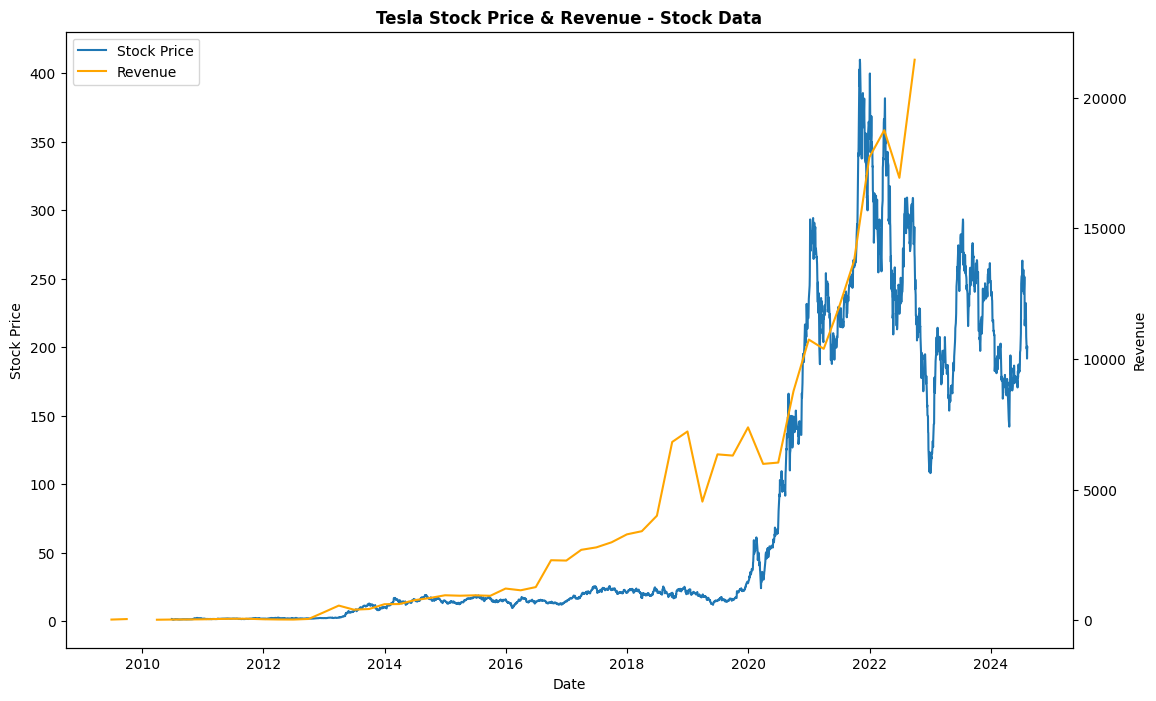

In [35]:


# Convert 'Revenue' column to numeric type
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])

# Convert 'Date' column to datetime type
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Sort the DataFrame by 'Date'
tesla_revenue.sort_values('Date', inplace=True)

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(13, 8))

    # Plot stock price on primary y-axis
    stock_line, = ax1.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price')

    # Create a secondary y-axis for revenue
    ax2 = ax1.twinx()
    revenue_line, = ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='orange', label='Revenue')
    ax2.set_ylabel('Revenue')

    # Combine the legend handles and labels from both axes
    lines = [stock_line, revenue_line]
    labels = [line.get_label() for line in lines]

    plt.title(title, fontweight='bold')
    plt.legend(lines, labels, loc='upper left')
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla Stock Price & Revenue - Stock Data')

## Question 6: Plot GameStop Stock Graph

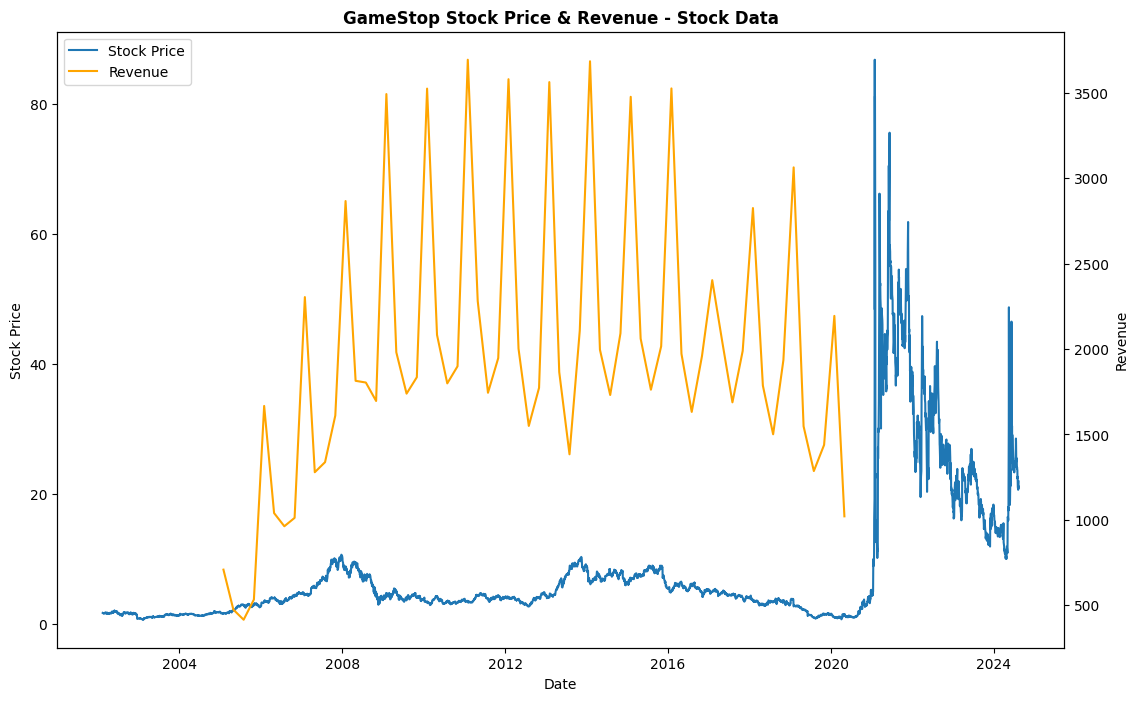

In [36]:
import matplotlib.pyplot as plt

# Convert 'Revenue' column to numeric type
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# Convert 'Date' column to datetime type
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Sort the DataFrame by 'Date'
gme_revenue.sort_values('Date', inplace=True)

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(13, 8))

    # Plot stock price on primary y-axis
    stock_line, = ax1.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price')

    # Create a secondary y-axis for revenue
    ax2 = ax1.twinx()
    revenue_line, = ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='orange', label='Revenue')
    ax2.set_ylabel('Revenue')

    # Combine the legend handles and labels from both axes
    lines = [stock_line, revenue_line]
    labels = [line.get_label() for line in lines]

    plt.title(title, fontweight='bold')
    plt.legend(lines, labels, loc='upper left')
    plt.show()

make_graph(gme_data, gme_revenue, 'GameStop Stock Price & Revenue - Stock Data')